# Estradiol: Main Paper Figure 3

In [2]:
# Some magic functions
%load_ext autoreload
%autoreload 2
%matplotlib widget

## Defining Paths

In [3]:
from pathlib import Path

root = Path("../../")
molecule = "estradiol"

# Path to the 2DJ dataset
# Under this directory, NMR-EsPy expects a ser file, an acqus file, and an acqu2s file to exist
data_dir = root / "data" / molecule / "1"

# Directory which results will be output to
output_dir = root / "code" / molecule / "output"
output_dir.mkdir(exist_ok=True, parents=True)

## Importing and Pre-processing the Data

In [4]:
import nmrespy as ne

estimator_path = output_dir / "estimator.pkl"
if estimator_path.is_file():
    estimator = ne.Estimator2DJ.from_pickle(estimator_path)
else:
    estimator = ne.Estimator2DJ.new_bruker(data_dir)
    estimator.phase_data(p0=4.563, p1=-6.239)
    estimator.to_pickle(estimator_path)

Saved file ../../code/estradiol/output/estimator.pkl.


## Estimation

In [5]:
import numpy as np

np.random.seed(0)

rerun_estimation = False
try:
    if rerun_estimation:
        raise ValueError("Re-runnning estimation.")
    estimator.get_results()
except ValueError:
    regions = [
        (2.29, 2.17), (2.12, 2.00), (1.95, 1.72),
        (1.65, 1.52), (1.45, 1.02),
    ]
    estimate_kwargs = dict(
        noise_region=(8.1, 7.9),
        region_unit="ppm",
        max_iterations=100,
        check_neg_amps_every=25,
    )
    initial_guesses = [20, 15, 40, 20, 90]
    for region, initial_guess in zip(regions, initial_guesses):
        estimator.estimate(
            region=region,
            initial_guess=initial_guess,
            **estimate_kwargs,
        )
        estimator.to_pickle(estimator_path, force_overwrite=True)

┌───────────────────────────────────────┐
│ESTIMATING REGION: 2.29 - 2.17 ppm (F2)│
└───────────────────────────────────────┘
┌─────────────┐
│MMEMP STARTED│
└─────────────┘
--> Computing number of oscillators...
	Number of oscillators has been pre-defined
	Number of oscillators: 20
--> Pencil parameters: 64, 54
--> Enhanced Block Hankel matrix constructed:
	Size: 3456 x 3575
	Memory: 0.1841GiB
--> Performing Singular Value Decomposition...
--> Checking for oscillators with negative damping...
	factors detected. These have been deleted.
	Corrected number of oscillations: 18
┌──────────────┐
│MMEMP COMPLETE│
└──────────────┘
Time elapsed: 0 mins, 19 secs, 86 msecs
┌────────────────────┐
│OPTIMISATION STARTED│
└────────────────────┘
┌───────────────────────────┐
│TRUST NCG ALGORITHM STARTED│
└───────────────────────────┘
┌───────┬──────────────┬──────────────┬──────────────┐
│ Iter. │  Objective   │  Grad. Norm  │ Trust Radius │
├───────┼──────────────┼──────────────┼──────────────┤
│ 0 

In [25]:
import copy
import matplotlib.pyplot as plt

colors = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])[:4]
colors.append("#808080")

def get_colors(mp_indices):
    return [colors[i] for i in mp_indices]
    
default_plot_kwargs= dict(
    region_unit="ppm",
    multiplet_lw=0.8,
    marker_size=15.0,
    figsize=(12.0, 5.0),
    axes_left=0.1,
    axes_right=0.99,
    axes_bottom=0.11,
    axes_top=0.98,
    contour_base=8.0e3,
    contour_factor=2.0,
    contour_nlevels=10,
    contour_color="#b0b0b0",
    multiplet_show_45=False,
    multiplet_show_center_freq=False,
    ratio_1d_2d=(3.0, 1.0),
)

def plot_result(estimator, **kwargs):
    plot_kwargs = copy.deepcopy(default_plot_kwargs)
    for key, value in kwargs.items():
        plot_kwargs[key] = value
    fig, axs = estimator.plot_result(**plot_kwargs)
    return fig, axs

Multiplet threshold used: 2.344 Hz


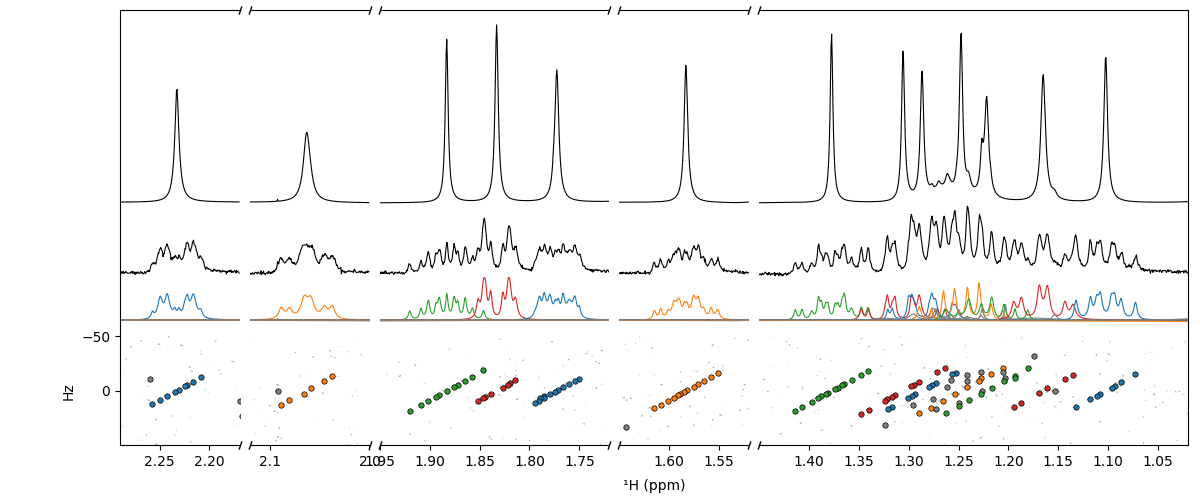

In [46]:
mp_thold = 3.0 * estimator.default_multiplet_thold
print("Multiplet threshold used: {:.3f} Hz".format(mp_thold))

multiplet_colors = get_colors(
    [4, 0, 4, 4, 4, 1, 4, 2, 3, 0, 4, 1, 4, 4, 2, 3, 0, 4, 4, 4, 1, 4, 4, 2, 3, 4, 0, 1]
)
plot_result(estimator, multiplet_thold=thold, multiplet_colors=multiplet_colors);